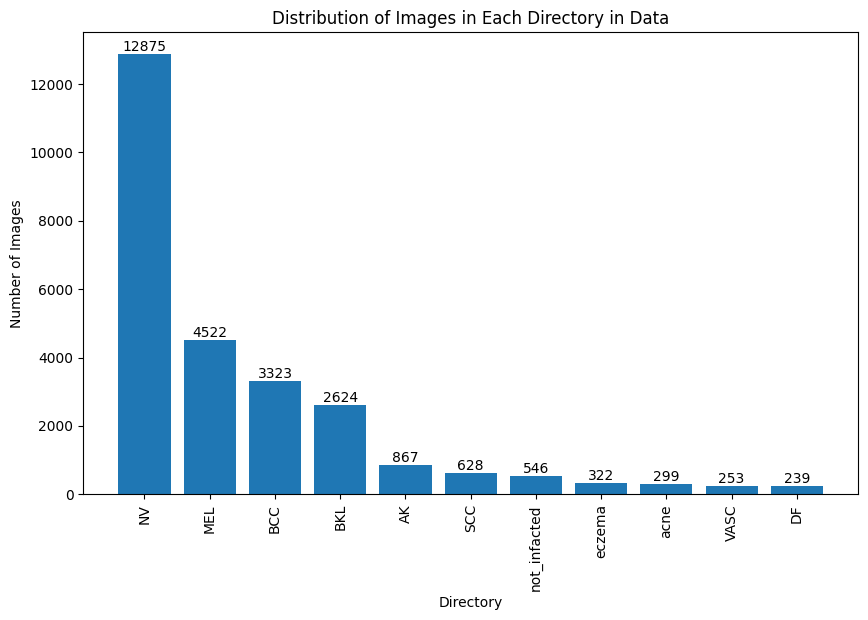

In [15]:
import os
# print number of images in each directory
def plot_distribution(dir):
    #plot Normal distribution of images in each directory
    import matplotlib.pyplot as plt
    import numpy as np
    x = []
    y = []
    data = []
    for directory in os.listdir(dir):
        if os.path.isdir(f'{dir}/{directory}'):
            data.append((directory, len(os.listdir(f"{dir}/{directory}"))))
    data.sort(key=lambda x: x[1], reverse=True)
    for d in data:
        x.append(d[0])
        y.append(d[1])
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x, y)
    # Add text annotations on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
    plt.xlabel('Directory')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images in Each Directory in {}'.format(dir))
    plt.xticks(rotation=90)
plot_distribution('Data')




In [6]:
import random
import shutil

def sample_images(directory):
    shutil.rmtree(f'sample/{directory}', ignore_errors=True)
    images = os.listdir(directory)
    n = 1000
    if len(images) < 1000:
        n=len(images)
    sample = random.sample(images, n)
    os.makedirs(f'sample/{directory}', exist_ok=True)
    for image in sample:
        shutil.copyfile(f'{directory}/{image}', f'sample/{directory}/{image}')

for directory in os.listdir('Data'):
    # if want to sample all images, comment the following line
    # if directory == "ance" or directory =='eczema':
    #     continue
    if os.path.isdir(f'Data/{directory}'):
        sample_images(f'Data/{directory}')
        print(f'{directory}: {len(os.listdir(f"sample/Data/{directory}"))}')



acne: 299
AK: 867
BCC: 1000
BKL: 1000
DF: 239
eczema: 322
MEL: 1000
not_infacted: 546
NV: 1000
SCC: 628
VASC: 253


In [7]:
#train test split 
import os
import shutil
import random
# Create a new directory
shutil.rmtree(f'sample/train', ignore_errors=True)
shutil.rmtree(f'sample/val', ignore_errors=True)
os.makedirs('sample/train', exist_ok=True)
os.makedirs('sample/val', exist_ok=True)
# Iterate through each folder
for folder in os.listdir('sample/Data'):
    folder_path = os.path.join('sample/Data', folder)
    if os.path.isdir(folder_path):
        # Get a random sample of images
        images = os.listdir(folder_path)
        random.shuffle(images)
        split_index = int(0.7 * len(images))
        train_images = images[:split_index]
        val_images = images[split_index:]
        # Move images to train/test folders
        for image in train_images:
            source = os.path.join(folder_path, image)
            target = os.path.join('sample/train', folder, image)
            os.makedirs(os.path.dirname(target), exist_ok=True)
            shutil.copyfile(source, target)
        for image in val_images:
            source = os.path.join(folder_path, image)
            target = os.path.join('sample/val', folder, image)
            os.makedirs(os.path.dirname(target), exist_ok=True)
            shutil.copyfile(source, target)





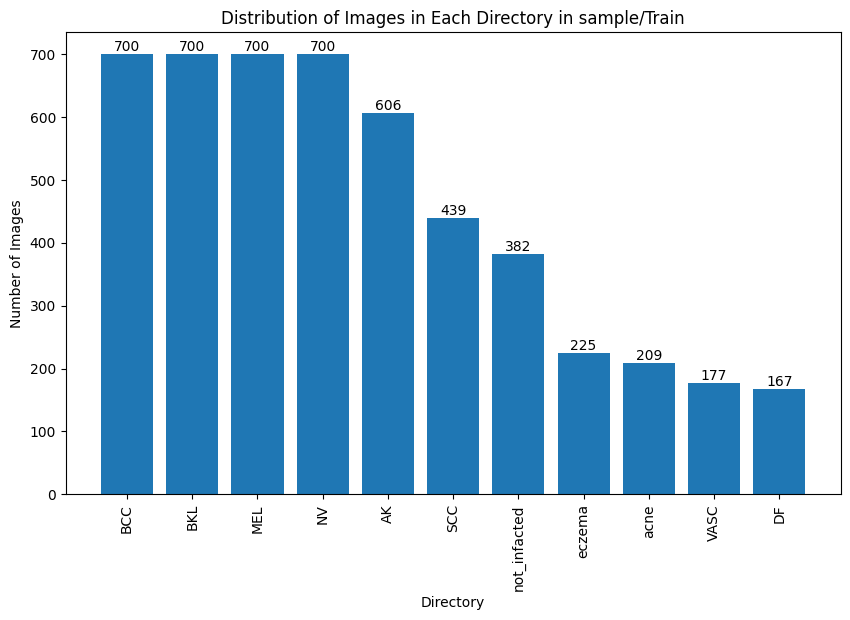

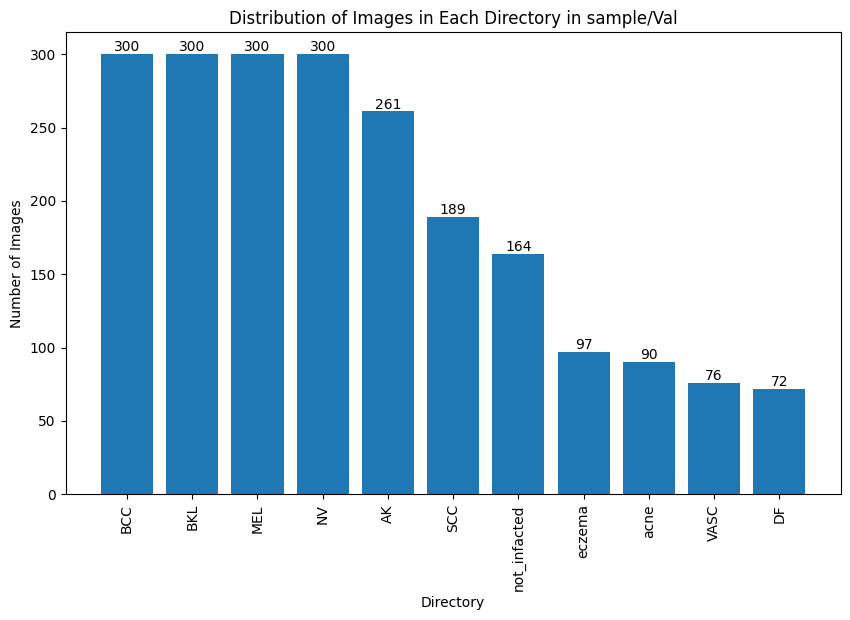

In [16]:
import os
# print number of images in each directory
plot_distribution('sample/Train')
plot_distribution('sample/Val')